In [36]:
import pandas as pd

# usecol 옵션으로 특정 column만 가져올 수 있음
df = pd.read_csv('./data/Fish.csv')
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# df.iloc (Integer-location) 숫자 인덱스로 행과 열을 선택
# [:, 1] (슬라이싱) == [행 선택, 열 선택] 구조
fish_weight = df_shuffled.iloc[:, 1].tolist()[:100]
fish_length = df_shuffled.iloc[:, 3].tolist()[:100]
fish_target = df_shuffled.iloc[:, 0].tolist()[:100]

train_weight = df_shuffled.iloc[:, 1].tolist()[100:]
train_length = df_shuffled.iloc[:, 3].tolist()[100:]
train_target = df_shuffled.iloc[:, 0].tolist()[100:]

In [37]:
import numpy as np

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
train_data = [[l, w] for l, w in zip(train_length, train_weight)]

mean = np.mean(fish_data, axis=0) # 각 컬럼의 평균
std = np.std(fish_data, axis=0)   # 각 컬럼의 표준편차

fish_scaled = (fish_data - mean) / std
train_scaled = (train_data - mean) / std # 주의: 테스트 데이터도 학습 데이터의 평균/표준편차로 나눠야 함

In [38]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(fish_scaled, fish_target)
kn.score(train_scaled, train_target)

0.5423728813559322

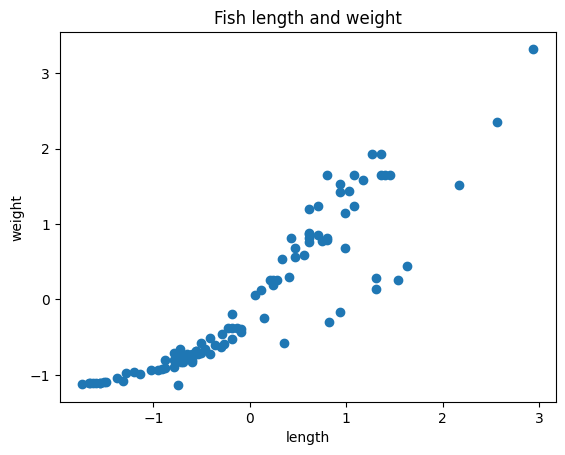

In [39]:
import matplotlib.pyplot as plt

plt.title('Fish length and weight')

plt.scatter(fish_scaled[:,0], fish_scaled[:,1])

plt.xlabel('length')
plt.ylabel('weight')
plt.show()